In [1]:
import pandas as pd
import numpy as np
from scipy.interpolate import InterpolatedUnivariateSpline
import matplotlib.pyplot as plt

def gradient(x,y):
    f = InterpolatedUnivariateSpline(x, y, k=5)
    dfdx = f.derivative()
    return dfdx(grid)

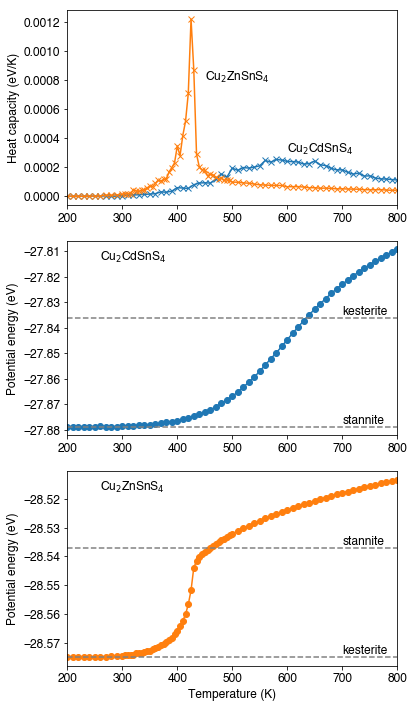

In [2]:
kwargs = {"delim_whitespace": True}
grid = np.arange(200,800,1)

df_ccts = pd.read_csv('mc_ccts.csv', **kwargs)
df_czts = pd.read_csv('mc_czts.csv', **kwargs)
df_ccts = df_ccts.iloc[::-1]
df_czts = df_czts.iloc[::-1]
#heat_ccts = gradient(df_ccts['T'], df_ccts['<potential_energy>'])
#heat_czts = gradient(df_czts['T'], df_czts['<potential_energy>'])

clex = {"czts":{"kest":-28.57494521, "stan":-28.53694805},"ccts":{"stan":-27.87869976, "kest":-27.83601938}}
plt.rcParams['figure.figsize'] = [6, 10]
plt.rcParams['font.size'] = 12
fig, (ax1,ax2,ax3) = plt.subplots(3,1)
for ax in (ax1,ax2,ax3):
    ax.set_xlim([200,800])
czts_str = r"Cu$_2$ZnSnS$_4$"
ccts_str = r"Cu$_2$CdSnS$_4$"
#    
ax1.plot(df_ccts['T'], df_ccts['heat_capacity'], '-x', color='C0')
#ax1.plot(grid, heat_ccts)
ax1.plot(df_czts['T'], df_czts['heat_capacity'], '-x', color='C1')
#ax1.plot(grid, heat_czts)
ax1.set_ylabel('Heat capacity (eV/K)')
ax1.text(450, 0.0008, czts_str)
ax1.text(600, 0.0003, ccts_str)
#
ax2.plot(df_ccts['T'], df_ccts['<potential_energy>'], '-o', color='C0')
ax2.set_ylabel('Potential energy (eV)')
ax2.axhline(clex['ccts']['kest'], ls='--', color='gray')
ax2.axhline(clex['ccts']['stan'], ls='--', color='gray')
ax2.text(700,clex['ccts']['kest'], 'kesterite', va='bottom')
ax2.text(700,clex['ccts']['stan'], 'stannite', va='bottom')
ax2.text(0.1, 0.9, ccts_str, transform=ax2.transAxes)
#
ax3.plot(df_czts['T'], df_czts['<potential_energy>'], '-o', color='C1')
ax3.set_ylabel('Potential energy (eV)')
ax3.axhline(clex['czts']['kest'], ls='--', color='gray')
ax3.axhline(clex['czts']['stan'], ls='--', color='gray')
ax3.text(700,clex['czts']['kest'], 'kesterite', va='bottom')
ax3.text(700,clex['czts']['stan'], 'stannite', va='bottom')
ax3.text(0.1, 0.9, czts_str, transform=ax3.transAxes)
ax3.set_xlabel('Temperature (K)')
plt.tight_layout()
plt.savefig('mc.png', dpi=100)